In [49]:
#import statemenets
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import random

**Problem 1**

In [2]:
#create environment
#take input from user
while True:
  try:
    dimension = int(input("Enter dimension of board: "))
    break
  except ValueError:
    print("Must be an integer")

while True: 
  try:
    num_mines = int(input("Enter number of mines: "))
    if num_mines > dimension**2:
      raise ValueError
    break
  except ValueError:
    print("Must be an integer and less than dimension^2")



Enter dimension of board: 10
Enter number of mines: 10


In [3]:
#initialize board
board = np.zeros((dimension, dimension))

#initialize mines
counter = 0
mines_set = set([])
while counter < num_mines:
  x = rand.randint(0, dimension)
  y = rand.randint(0, dimension)
  if (x,y) in mines_set:
    continue
  else:
    mines_set.add((x,y))
    board[x][y] = 1
    counter += 1

print(board)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [4]:
#clue that our agent will receive
#returns the total sum of the neighbors of current_position
def clue(current_position, board,  dimension):
  x = current_position[0]
  y = current_position[1]
  sum = 0

  if x+1 < dimension:
    sum += board[x+1][y]
    if y+1 < dimension:
      sum += board[x+1][y+1]
    if y-1 >= 0:
      sum += board[x+1][y-1]

  if x-1 >= 0:
    sum += board[x-1][y]
    if y+1 < dimension:
      sum += board[x-1][y+1]
    if y-1 >= 0:
      sum += board[x-1][y-1]

  if y+1 < dimension:
    sum += board[x][y+1]
  
  if y-1 >= 0:
    sum += board[x][y-1]

  return sum
  

In [58]:
#function that returns a set of the neighbors for a given point
def neighbors(current_position, board,  dimension):
  x = current_position[0]
  y = current_position[1]
  nodes = set([])

  if x+1 < dimension:
    nodes.add((x+1,y))
    if y+1 < dimension:
      nodes.add((x+1,y+1))
    if y-1 >= 0:
      nodes.add((x+1,y-1))

  if x-1 >= 0:
    nodes.add((x-1,y))
    if y+1 < dimension:
      nodes.add((x-1,y+1))
    if y-1 >= 0:
      nodes.add((x-1,y-1))

  if y+1 < dimension:
    nodes.add((x,y+1))
  
  if y-1 >= 0:
    nodes.add((x,y-1))

  return nodes

In [59]:
#gives the number of neighbors that are safe for a given coordinate
def safe_squares(current_position, board,  dimension):
  x = current_position[0]
  y = current_position[1]
  total = 0

  if x+1 < dimension:
    total += 1
    if y+1 < dimension:
      total += 1
    if y-1 >= 0:
      total += 1
  if x-1 >= 0:
    total += 1
    if y+1 < dimension:
      total += 1
    if y-1 >= 0:
      total += 1
  if y+1 < dimension:
    total += 1
  if y-1 >= 0:
    total += 1

  mines = clue(current_position, board,  dimension)
  safe = total - mines

  return safe


In [62]:
def basic_algorithm(board, dimension):
  mines = set([])
  neighbor_fringe = set([])
  unexplored_set = set([])
  death = 0
  #uses the unexplored_set to go through all points on board
  for a in range(dimension):
    for b in range(dimension):
      unexplored_set.add((a,b))

  #while loop here for each pair in board that isn't in explored space
  while len(unexplored_set) > 0:
    coord_1 = unexplored_set.pop()
    neighbor_fringe.add(coord_1)
    #continues to work through the safe neighbors added to the neighbor_fringe and when there is no safe neighbors, 
    #will go to random unexplored point
    while len(neighbor_fringe) >0:
      coord = neighbor_fringe.pop()

      #if point is a mine, add a death and get rid of it from the unexplored set
      if board[coord[0]][coord[1]] == 1:
        death += 1
        mines.add(coord)
      #print(coord)
      #if point is not a mine, work through the given conditions
      if board[coord[0]][coord[1]] == 0:
        clue_num = clue(coord, board, dimension)
        neighbor_set = neighbors(coord, board, dimension)
        mine_count = 0
        hidden = 0
        hidden_set = set([])
        safe = 0
        safe_set = set([])
        
        #prep a safe_set and hidden_set to use in the conditions below
        for i in neighbor_set:
          if i in mines:
            mine_count += 1
          if i in unexplored_set:
            hidden += 1
            hidden_set.add(i)
          if i not in unexplored_set and i not in mines:
            safe += 1
            safe_set.add(i)

        #first condition
        if clue_num - mine_count == hidden:
          for j in hidden_set:
            mines.add(j)
            unexplored_set.remove(j)

       #second condition
        if len(neighbor_set) - clue_num - safe == hidden:
          for k in hidden_set:
            neighbor_fringe.add(k)
            unexplored_set.remove(k) 

  return mines,death   


In [63]:
mines,deaths = basic_algorithm(board,dimension)
board_new = np.zeros((dimension, dimension))
#initialize mines
counter = 0
for i in mines:
  board_new[i[0]][i[1]] = 1

print(board_new)
print(deaths)
print(len(mines)-deaths)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
0
1


In [64]:
print(board)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Text(0.5, 0, 'mine density')

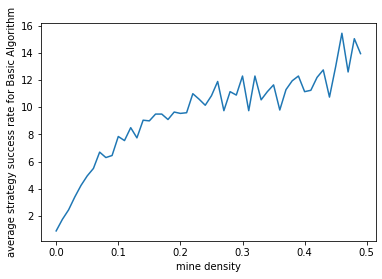

In [65]:
#Mine Density Chart for Basic Agent
probabilities = []
success_percentage = []

#max dimension set to 10 X 10
dim = 10
for num_mines in range(50):
  success = []
  count = 0
  #print(q)
  #get 20 examples for each value of q
  while count < 20:
    #print(count)
    #create new board
    board = np.zeros((dimension, dimension))
    counter_1 = 0
    mines_set = set([])
    while counter_1 <= num_mines:
      x = rand.randint(0, dimension)
      y = rand.randint(0, dimension)
      if (x,y) in mines_set:
        continue
      else:
        mines_set.add((x,y))
        board[x][y] = 1
        counter_1 += 1
    #determine if success or not
    mines, deaths = basic_algorithm(board,dimension)
    success.append(len(mines)-deaths)
    count += 1
  success_percentage.append(sum(success)/len(success))
  probabilities.append(num_mines/(dim*dim))  

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("average strategy success rate for Basic Algorithm")
plt.xlabel("mine density")

**Problem 2**

In [66]:
#initialize board
board = np.zeros((dimension, dimension))

remaining_spaces = set([])
for i in range(dimension):
  for j in range(dimension):
    remaining_spaces.add((i,j))

#initialize mines
counter = 0
mines_set = set([])
while counter < num_mines:
  x = rand.randint(0, dimension)
  y = rand.randint(0, dimension)
  if x == 0 and y == 0:
    continue
  if (x,y) in mines_set:
    continue
  else:
    mines_set.add((x,y))
    board[x][y] = 1
    counter += 1


print(board)

[[0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [67]:
#clue that our agent will receive
#returns the total sum of the neighbors of current_position
def clue(current_position, board,  dimension):
  x = current_position[0]
  y = current_position[1]
  sum = 0
  
  if x+1 < dimension:
    sum += board[x+1][y]
    if y+1 < dimension:
      sum += board[x+1][y+1]
    if y-1 >= 0:
      sum += board[x+1][y-1]

  if x-1 >= 0:
    sum += board[x-1][y]
    if y+1 < dimension:
      sum += board[x-1][y+1]
    if y-1 >= 0:
      sum += board[x-1][y-1]

  if y+1 < dimension:
    sum += board[x][y+1]
  
  if y-1 >= 0:
    sum += board[x][y-1]

  return sum
  

In [68]:
def get_valid_neighbors(current_node, remaining_spaces):
  x, y = current_node
  neighbors = set([])
  for i in get_neighbors:
    neighbor_x = x + i[0]
    neighbor_y = y + i[1]

    if neighbor_x >= dimension or neighbor_x < 0:
      continue
    elif neighbor_y >= dimension or neighbor_y < 0:
      continue
    elif (neighbor_x, neighbor_y) in remaining_spaces:
      neighbors.add((neighbor_x, neighbor_y))
  return neighbors

In [69]:
#evaluate an assertion in knowledge_base 
def evaluate_assertion(assertion, variables, dimension):
  x,y,v = assertion #(x,y) -> location, v -> value of cell( 0 or 1)
  sum = 0
  #loop through possible neighbors
  for i in get_neighbors:
    neighbor_x = x + i[0]
    neighbor_y = y + i[1]
    if neighbor_x >= dimension or neighbor_x < 0:
      continue
    elif neighbor_y >= dimension or neighbor_y < 0:
      continue
    #add values of known cells
    value = board_perception[neighbor_x][neighbor_y]
    if value != -1:
      sum += value
    #if neighbor is in variables dictionary, add its value
    elif (neighbor_x, neighbor_y) in variables:
      sum += variables[(neighbor_x, neighbor_y)]
    #cannot compute sum of unkown vales so return true
    else:
      return True
  return sum == v



In [70]:
#will query all neighbors of current position and call evaluate_assertion for each assertion in knowledge_base
def make_inference(knowledge_base, board_perception, value, variable_dict, query):
  qx, qy, qv = query
  #print("query : " + str(query))
  if value == 0 and qv == 0:
    return True
  
  #get all unknown cells(value = -1) and add them to variable list
  variable_list = []
  for i in get_neighbors:
    neighbor_x = qx + i[0]
    neighbor_y = qy + i[1]
    #print(neighbor_x, neighbor_y)
      

    if neighbor_x >= dimension or neighbor_x < 0:
      continue
    elif neighbor_y >= dimension or neighbor_y < 0:
      continue
    value = board_perception[neighbor_x][neighbor_y]
    if value == -1:
        variable_list.append((neighbor_x, neighbor_y))
  #print("variable_list")  
  #print(variable_list)
  #q -> not q for contradiction proof   
  if (qx,qy) not in variable_dict:
    variable_dict[(qx,qy)] = 1-qv
  #constraint satisfaction problem -> loop through all possible assignments and find solution
  #since all possible solutions are 0 or 1, use binary
  satisfiable = False
  flag = 0
  for var in range(2**(len(variable_list))):
    #convert to binary
    var_binary = format(var, '#0%db' % (len(variable_list) + 2))
    
    #temp_dict = hidden cells (value = -1)
    temp_dict = {}
    #start at 2 since '0b' prefix on binary numbers
    for i in range(2, len(var_binary)):
      if len(variable_list) == 0:
        break
      temp_dict[variable_list[i-2]] = int(var_binary[i])

    #add temp_dict to current variable_dict
    assertion_dict = {}
    assertion_dict = dict(list(variable_dict.items()) + list(temp_dict.items()))
    #print("assertion_dict")
    #print(assertion_dict)
    for assertion in knowledge_base:
      #print(flag)
      #check each assertion in knowledge base with our contradicted query
      truth_val = evaluate_assertion(assertion, assertion_dict, dimension)
      if not truth_val:
        flag += 1
        break
        
    assertion_dict.clear()
    if flag-1 != var:
      satisfiable = True
      variable_dict.pop((qx,qy))
      break
      
  #return not satisfiability of knowledge base
  return not satisfiable
      


  

In [71]:
#initialize board
board = np.zeros((dimension, dimension))

remaining_spaces = set([])
for i in range(dimension):
  for j in range(dimension):
    remaining_spaces.add((i,j))

#initialize mines
counter = 0
mines_set = set([])
while counter < num_mines:
  x = rand.randint(0, dimension)
  y = rand.randint(0, dimension)
  if x == 0 and y == 0:
    continue
  if (x,y) in mines_set:
    continue
  else:
    mines_set.add((x,y))
    board[x][y] = 1
    counter += 1


#print(board)

In [72]:
start = (random.randint(0,dimension-1),random.randint(0,dimension-1))
board_perception = np.zeros((dimension, dimension)) #-1: unknown, 0: clear, 1: mine

#initialize board perception
for i in range(dimension):
  for j in range(dimension):
    board_perception[i][j] = -1

knowledge_base = [] #(0,0): location, 0: clue
board_perception[start[0]][start[1]] = 0 #(known value)

#bookkeeping values
death_counter = 0
mine_counter = 0

get_neighbors = [] #list of possible neighbors
for i in range(-1,2):
  for j in range(-1,2):
    if i==0 and j==0:
      continue
    get_neighbors.append((i,j))

#print(get_neighbors)
#fringe - spaces our agent will move to
fringe = []
fringe.append(start)

#variable assignment disctionary
variable_dict = {}
variable_dict[start] = 0

#loop to run through the board
while(-1 in board_perception):
  #update current position
  if len(fringe) > 0: #take from fringe
    current_position = fringe.pop(0)
    remaining_spaces.remove(current_position)
  elif len(remaining_spaces) > 0: #if fringe empty take from remaining spaces
    current_position = remaining_spaces.pop()
  else:
    break
  #check if mine 
  if current_position in mines_set:
    death_counter += 1
    variable_dict[current_position] = 1
    print("random death")
    board_perception[current_position[0]][current_position[1]] = 1
  else:
    knowledge_base.append((current_position[0], current_position[1], clue(current_position, board, dimension)))
    variable_dict[current_position] = 0
    board_perception[current_position[0]][current_position[1]] = 0

  #print("knowledge base")
  #print(knowledge_base)
  #print("variable dict")
  #print(variable_dict)
  #print(board_perception)
 #loop through neighbors asserting if they are 0(clear) and 1(mine)
  neighbors = get_valid_neighbors(current_position, remaining_spaces)
  for i in neighbors: 
    if i in variable_dict:
        continue
        
    #query if neighbor is clear/mine
    query_mine = (i[0], i[1], 1)
    query_clear = (i[0], i[1], 0)

    #query mine
    #if mine, update board_perception, knowledge_base, and remaining_spaces
    if make_inference(knowledge_base, board_perception, clue(current_position, board, dimension), variable_dict, query_mine):
      board_perception[i[0]][i[1]] = 1
      variable_dict[i] = 1
      #print("Found mine")
      mine_counter += 1
      if i in remaining_spaces:
        remaining_spaces.remove(i)
    #query clear
    #if clear, update board_perception, knowledge_base, remaining_spaces, and add to fringe to be explored
    elif make_inference(knowledge_base, board_perception, clue(current_position, board, dimension), variable_dict, query_clear):
      variable_dict[i] = 0
      board_perception[i[0]][i[1]] = 0
      if i not in fringe:
        fringe.append(i)
print("death_counter: " + str(death_counter))
print("mine_found_counter: " + str(mine_counter))
print(board_perception)


random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
death_counter: 28
mine_found_counter: 21
[[0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
 [1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 0. 0. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 0. 1. 1. 1. 0. 0. 1.]]


Streaming output truncated to the last 5000 lines.
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
29
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
20
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
17
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
random death
rand

Text(0.5, 0, 'mine density')

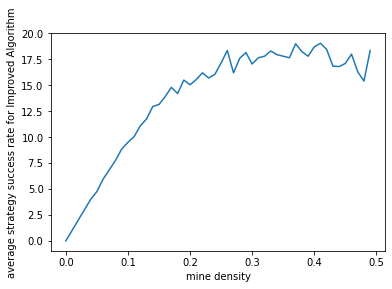

In [73]:
#Mine Density Chart for Improved Agent
dimension = 10
success_counter = 0
probabilities = []
success_percentage = []
for num_mines in range(50):
  success_counter = 0
  average_success = []
  for i in range(20):

    board = np.zeros((dimension, dimension))
    remaining_spaces = set([])
    for i in range(dimension):
      for j in range(dimension):
        remaining_spaces.add((i,j))
    counter = 0
    mines_set = set([])
    while counter < num_mines:
      x = rand.randint(0, dimension)
      y = rand.randint(0, dimension)
      if x == 0 and y == 0:
        continue
      if (x,y) in mines_set:
        continue
      else:
        mines_set.add((x,y))
        board[x][y] = 1
        counter += 1

    start = (random.randint(0,dimension-1),random.randint(0,dimension-1))
    board_perception = np.zeros((dimension, dimension)) #-1: unknown, 0: clear, 1: mine

    #initialize board perception
    for i in range(dimension):
      for j in range(dimension):
        board_perception[i][j] = -1

    knowledge_base = [] #(0,0): location, 0: clue
    board_perception[start[0]][start[1]] = 0 #(known value)

    #bookkeeping values
    death_counter = 0
    mine_counter = 0

    get_neighbors = [] #list of possible neighbors
    for i in range(-1,2):
      for j in range(-1,2):
        if i==0 and j==0:
          continue
        get_neighbors.append((i,j))

    #print(get_neighbors)
    #fringe - spaces our agent will move to
    fringe = []
    fringe.append(start)

    #variable assignment disctionary
    variable_dict = {}
    variable_dict[start] = 0

    #loop to run through the board
    while(-1 in board_perception):
      #update current position
      if len(fringe) > 0: #take from fringe
        current_position = fringe.pop(0)
        remaining_spaces.remove(current_position)
      elif len(remaining_spaces) > 0: #if fringe empty take from remaining spaces
        current_position = remaining_spaces.pop()
      else:
        break
      #check if mine 
      if current_position in mines_set:
        death_counter += 1
        variable_dict[current_position] = 1
        print("random death")
        board_perception[current_position[0]][current_position[1]] = 1
      else:
        knowledge_base.append((current_position[0], current_position[1], clue(current_position, board, dimension)))
        variable_dict[current_position] = 0
        board_perception[current_position[0]][current_position[1]] = 0

      #print("knowledge base")
      #print(knowledge_base)
      #print("variable dict")
      #print(variable_dict)
      #print(board_perception)
    #loop through neighbors asserting if they are 0(clear) and 1(mine)
      neighbors = get_valid_neighbors(current_position, remaining_spaces)
      for i in neighbors: 
        if i in variable_dict:
            continue
            
        #query if neighbor is clear/mine
        query_mine = (i[0], i[1], 1)
        query_clear = (i[0], i[1], 0)

        #query mine
        #if mine, update board_perception, knowledge_base, and remaining_spaces
        if make_inference(knowledge_base, board_perception, clue(current_position, board, dimension), variable_dict, query_mine):
          board_perception[i[0]][i[1]] = 1
          variable_dict[i] = 1
          #print("Found mine")
          mine_counter += 1
          if i in remaining_spaces:
            remaining_spaces.remove(i)
        #query clear
        #if clear, update board_perception, knowledge_base, remaining_spaces, and add to fringe to be explored
        elif make_inference(knowledge_base, board_perception, clue(current_position, board, dimension), variable_dict, query_clear):
          variable_dict[i] = 0
          board_perception[i[0]][i[1]] = 0
          if i not in fringe:
            fringe.append(i)
    #print(death_counter)
    average_success.append(mine_counter) 
  
  probabilities.append(num_mines/(dimension*dimension))  
  success_percentage.append(sum(average_success)/len(average_success))
    #print("death_counter: " + str(death_counter))
    #print("mine_found_counter: " + str(mine_counter))
    #print(board_perception)

plt.plot(probabilities, success_percentage)
plt.ylabel("average strategy success rate for Improved Algorithm")
plt.xlabel("mine density")